Constrained Utility Maximization
====================

This example solves a demand problem with Cobb-Douglas utility 


$$U(x_1,x_2) = x_1^\alpha x_2^\beta$$

and budget constraint

$$M = x_1p_1+x_2p_2$$

Solving for $x_2$ to obtain the budget constraint in terms of $M$ and $x_1$ gives

$$x_2 = \frac{M}{p_2} - x_1\frac{p_1}{p_2}$$

Solving for an isoquant in terms of $U$ and $x_1$

$$x_2 = \left( \frac{U}{x_1^\alpha}\right)^\frac{1}{\beta}$$


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from __future__ import division

def utility(x1,alpha,x2,beta):
    return (x1**alpha)*(x2**beta)

def isoquant(x1,alpha,beta,u):
    return (u/(x1**alpha))**(1/beta)

def budgetconst(m,p1,p2,x1):
    return (m/p2)-(p1/p2)*x1

Finding Optimal Point
------------------------

Using a Lagrangian to find the optimal point

$$L(x_1,x_2) = x_1^\alpha x_2^\beta + \lambda(M - x_1p_1 - x_2p_2)$$

Differentiate with respect to $x_1$ and $x_2$

$$ \frac{\partial L}{\partial x_1} = \alpha x_1^{\alpha-1} x_2^\beta - \lambda{p_1} $$
$$ \frac{\partial L}{\partial x_2} = \beta x_2^{\beta-1} x_1^\alpha - \lambda{p_2} $$

Setting both first order conditions $=0$ and substitute for $\lambda$ and solving for $x_1$ in terms of $x_2$

$$ x_1 = \frac{\alpha p_2}{\beta p_1}x_2$$

Substitute into the budget constraint to solve for $x_2$

$$x_2 = \frac{M}{\frac{\alpha}{\beta}p_2}  + p_2$$

Now we can solve for $x_2$ using parameters $\alpha$, $\beta$, and price.

In [5]:
#-Find Optimal Point Function-#
def find_optimal(p1,p2,alpha,beta,m=1):
    x2 = m/((alpha/beta)*(p2)+p2)
    x1 = (alpha/beta)*(p2/p1)*x2
    u = utility(x1,alpha,x2,beta)
    return x1,x2,u

Plot
-----

Now that the functions have been defined we can use them to construct an interactive plot



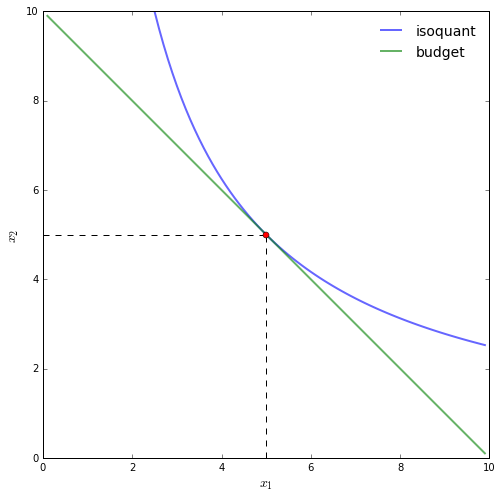

In [6]:
#-Parameters-#
alpha = 0.5
beta = 0.5
p1 = 1
p2 = 1
m = 10

@interact(alpha=(0.01,0.99,0.01),beta=(0.01,0.99,0.01), p1=(1,10,1),p2=(1,10,1),m=(1,24,1))
def interact_figure(alpha=alpha,beta=beta,p1=p1,p2=p2,m=m):
    x1i,x2i,u = find_optimal(p1,p2,alpha,beta,m)
    #-Figure-#
    x1 = np.arange(0.1,10,0.1)
    x2a = isoquant(x1,alpha,beta,u)
    x2b = budgetconst(m,p1,p2,x1)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(x1, x2a, lw=2, alpha=0.6, label='isoquant')
    ax.plot(x1, x2b, lw=2, alpha=0.6, label='budget')
    ax.vlines(x1i,0,x2i, linestyles="dashed")
    ax.hlines(x2i,0,x1i, linestyles="dashed")
    ax.plot(x1i,x2i,'or')
    ax.set_xlabel(r'$x_{1}$', fontsize=14)
    ax.set_xlim(0, 10)
    ax.set_ylabel('$x_{2}$', fontsize=14)
    ax.set_ylim(0, 10)
    ax.legend(loc='upper right', frameon=False, fontsize=14)
    plt.show()